In [1]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
import os, sys
import control as ct

In [2]:
fs = 10

data = [np.genfromtxt(entry.path, delimiter='\t') 
        for entry in os.scandir("measurements") 
        if entry.is_file()]
data = np.stack(data, axis=0)
averaged = np.mean(data, axis=0)
averaged = np.delete(averaged, 0, 1)*9.81*1000

In [4]:
data.shape

(30, 12001, 4)

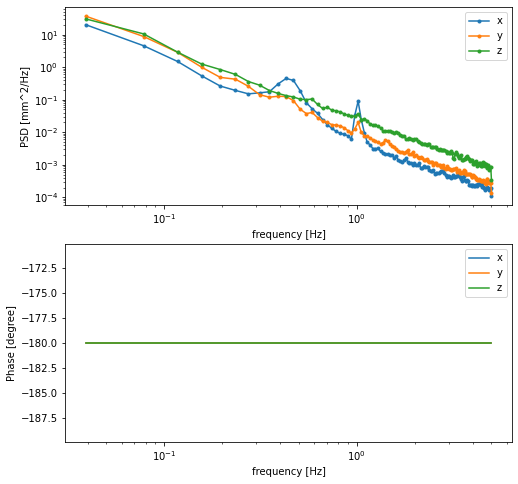

In [24]:
f, Pxx_den = signal.welch(averaged, fs, nperseg=256, axis=0)
omega = 2*np.pi*f[1:]
mag, phase, *_ = ct.tf(1, [1, 0, 0]).frequency_response(omega)

fig, (ax1, ax2) = plt.subplots(figsize=(8,8), nrows=2)

labels = ['x', 'y', 'z']
for i, label in enumerate(labels):
    ax1.loglog(f[1:], Pxx_den[1:, i]*mag, '.-',label=label)
ax1.set_ylabel('PSD [mm^2/Hz]')
ax1.set_xlabel('frequency [Hz]')
ax1.legend()

for i, label in enumerate(labels):
    ax2.semilogx(f[1:], phase/np.pi*180, label=label)
ax2.set_ylabel('Phase [degree]')
ax2.set_xlabel('frequency [Hz]')
ax2.legend()
plt.show()